In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [76]:
import warnings 
warnings.filterwarnings('ignore') 

In [77]:
df=pd.read_csv('insurance.csv') 

In [78]:
df.head() 

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<AxesSubplot: >

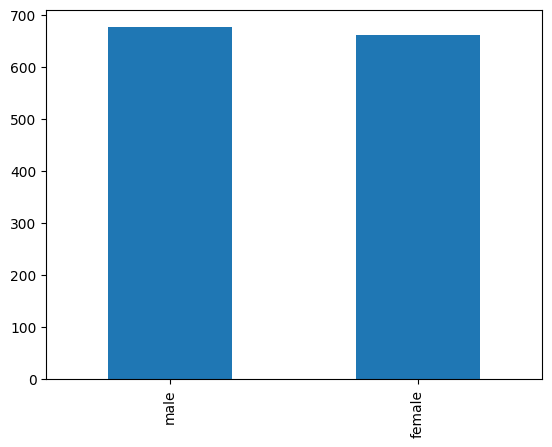

In [79]:
df['sex'].value_counts().plot(kind='bar') 

<AxesSubplot: xlabel='bmi', ylabel='Density'>

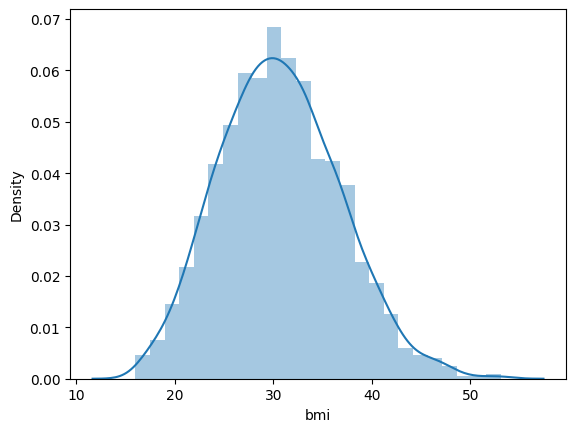

In [80]:
sns.distplot(df['bmi'],kde=True) 

<AxesSubplot: xlabel='age', ylabel='Density'>

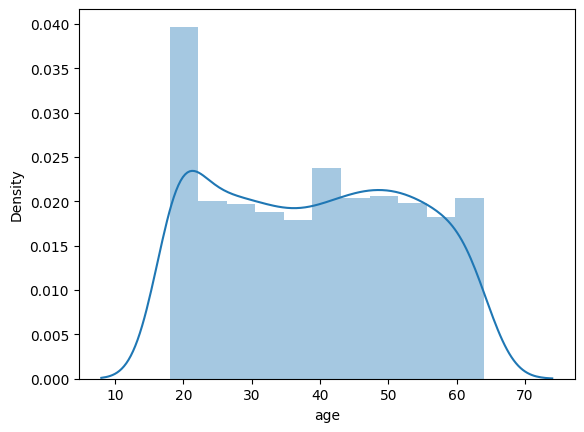

In [81]:
sns.distplot(df['age'],kde=True) 

In [82]:
df.shape 

(1338, 7)

In [83]:
df.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [84]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
df.duplicated().sum() 

1

In [86]:
df.drop_duplicates(inplace=True)  

In [87]:
df.shape 

(1337, 7)

In [88]:
df.describe() 

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [89]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


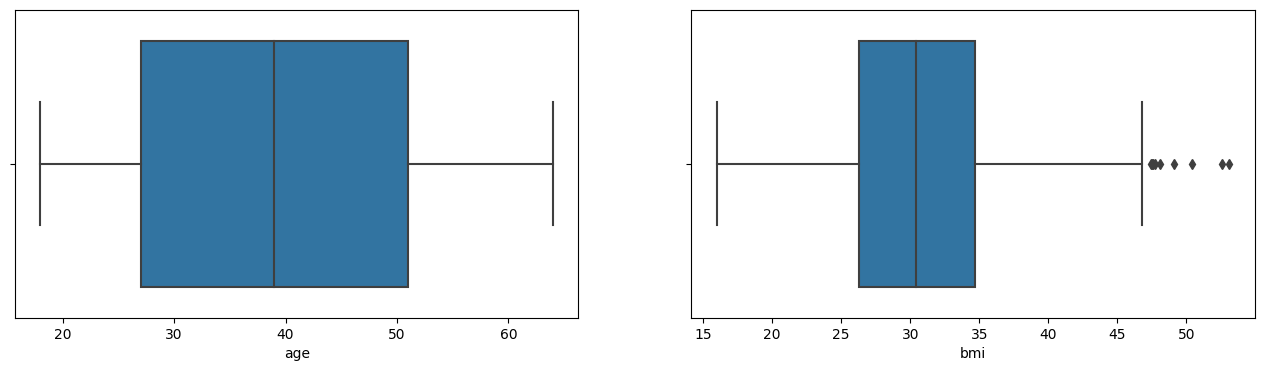

In [90]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(x=df['age']) 
plt.subplot(122)
sns.boxplot(x=df['bmi'])
plt.show() 

<AxesSubplot: xlabel='children'>

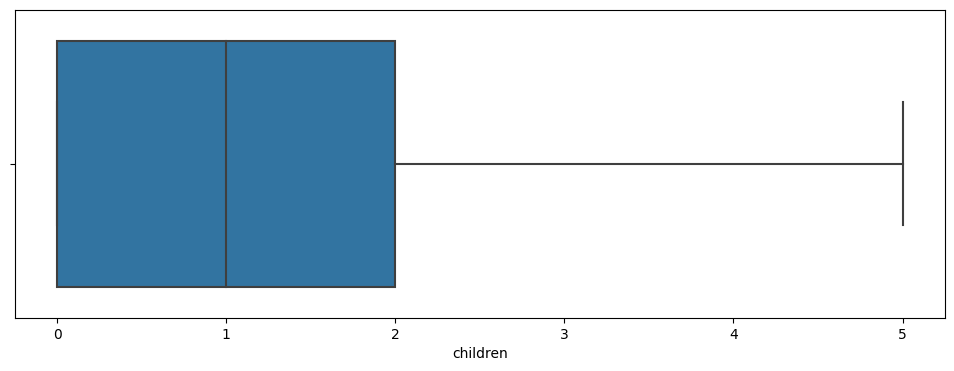

In [91]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['children']) 

In [92]:
df[df['bmi']>=50]  

,age,sex,bmi,children,smoker,region,expenses
847,23,male,50.4,1,no,southeast,2438.06
1047,22,male,52.6,1,yes,southeast,44501.40
1317,18,male,53.1,0,no,southeast,1163.46


In [93]:
df['sex']=df['sex'].map({'male':1,'female':0}) 

In [94]:
df['smoker']=df['smoker'].map({'yes':1,'no':0}) 

In [95]:
df.head() 

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


<AxesSubplot: >

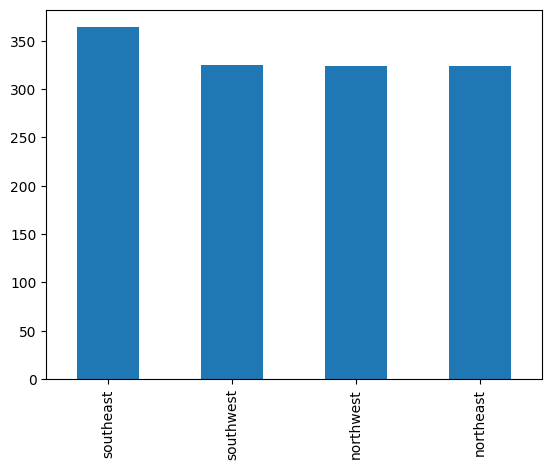

In [96]:
df['region'].value_counts().plot(kind='bar') 

In [97]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


In [98]:
X=df.drop('expenses',axis='columns')
y=df['expenses'] 

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20) 

In [100]:
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline 

In [101]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import GradientBoostingRegressor 

In [102]:
grad_boost=GradientBoostingRegressor() 

In [103]:
ohe=OneHotEncoder()
ohe.fit(X[['region']]) 

OneHotEncoder()

In [104]:
col_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),[5]),remainder='passthrough') 

In [105]:
pipe=make_pipeline(col_trans,grad_boost) 

In [106]:
pipe.fit(x_train,y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  [5])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [107]:
from sklearn.metrics import r2_score 

In [108]:
r2_score(y_test,pipe.predict(x_test)) 

0.8754367836865695

In [109]:
pipe.predict([[19,0,27.9,0,1,'southwest']])   

array([18945.53077241])

In [110]:
import pickle 

with open ('insurance.pkl','wb') as file:
    pickle.dump(pipe,file)  